In [2]:
from pyrosm import OSM, get_data
from shapely.geometry import box
import geopandas as gpd
import geocube
from geocube.api.core import make_geocube
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.style.use("bmh")

# Prepare data
osm = OSM(get_data("test_pbf"))
e = osm.get_network()
b = osm.get_buildings()

minx = 26.934
miny = 60.521
maxx = 26.9375
maxy = 60.522

bbox = gpd.GeoDataFrame(
    {"geometry": box(minx, miny, maxx, maxy)}, index=[0], crs="epsg:4326"
)

# Select
roads = gpd.sjoin(e, bbox)
buildings = gpd.sjoin(b, bbox)

# Reproject
epsg = 3067
crs = f"epsg:{epsg}"

roads = roads.to_crs(epsg=epsg)
buildings = buildings.to_crs(epsg=epsg)

# Create a dummy variable
roads["value"] = 1
buildings["value"] = 1

# Rasterize
# resolution = (-0.00009, 0.00009) # decimal degrees
resolution = (-10, 10)  # meters
roads_raster = make_geocube(
    roads, measurements=["value"], resolution=resolution, output_crs=crs
)
# resolution = (-0.00002, 0.00002) # decimal degrees
resolution = (-1, 1)  # meters
buildings_raster = make_geocube(
    buildings, measurements=["value"], resolution=resolution, output_crs=crs
)

/opt/miniconda3/envs/python-gis-book/lib/python3.11/site-packages/pyrosm/networks.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  edges, nodes = prepare_geodataframe(


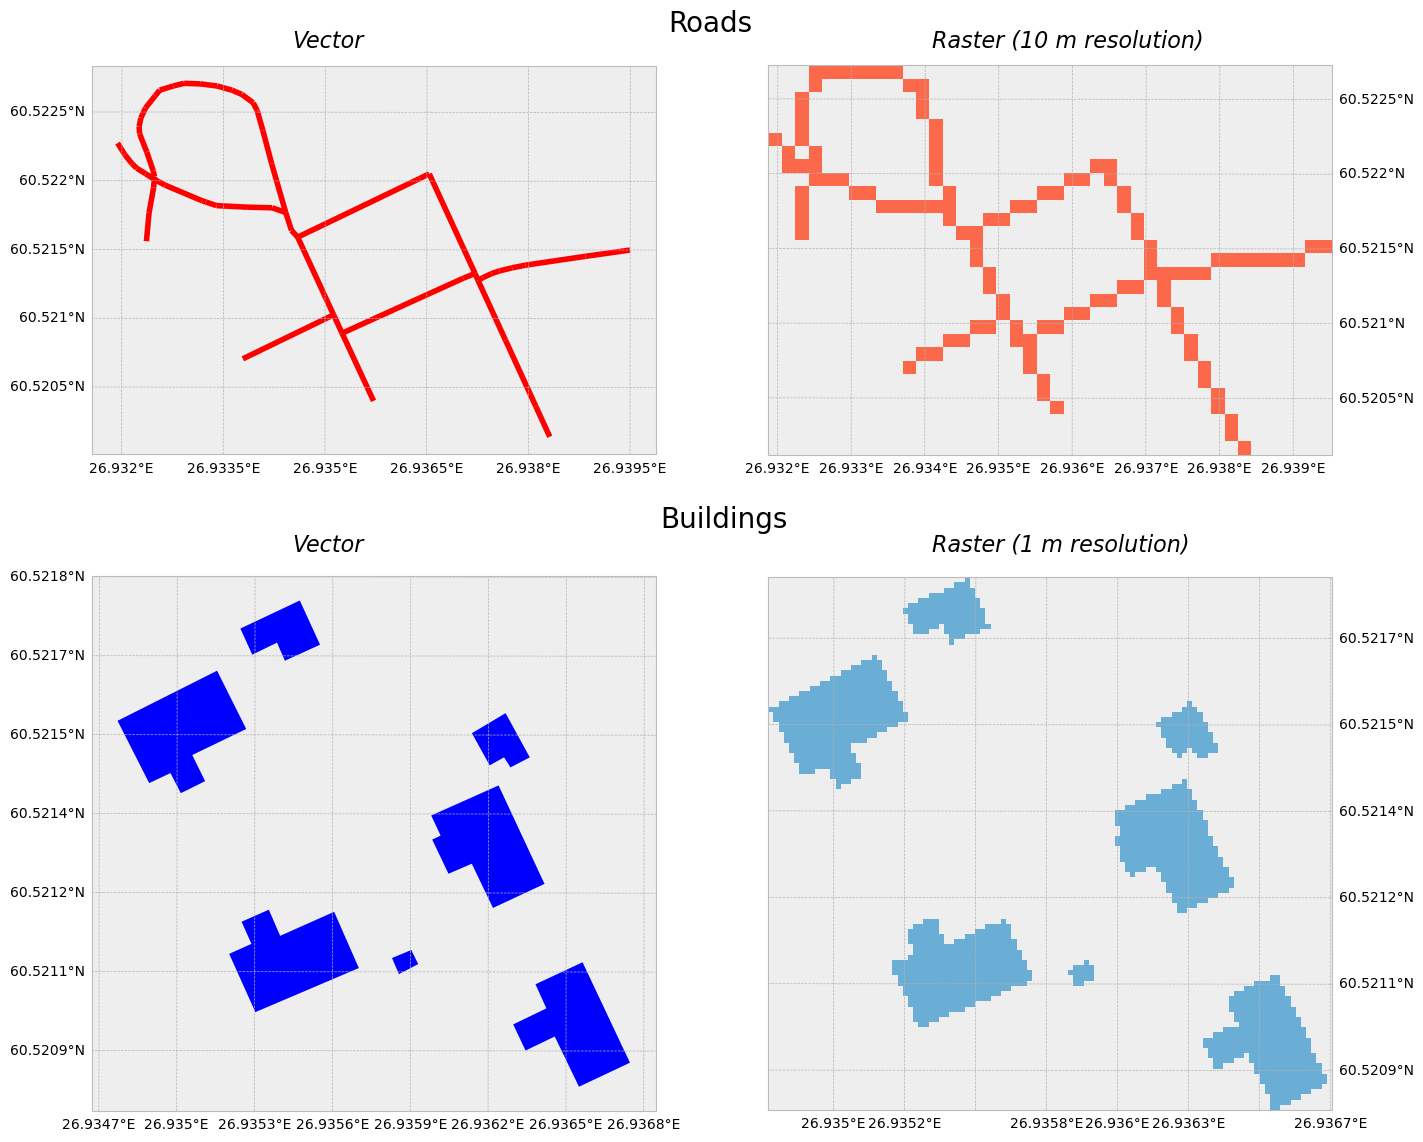

In [5]:
fix, axes = plt.subplots(
    nrows=2, ncols=2, figsize=(16, 16), subplot_kw={"projection": ccrs.epsg(3067)}
)

# Plot roads vector
roads.plot(ax=axes[0][0], lw=4, color="red", aspect=None)
# Plot roads rasterized
_ = roads_raster["value"].plot(
    ax=axes[0][1], add_colorbar=False, add_labels=False, cmap="Reds"
)

# Plot buildings vector
buildings.plot(ax=axes[1][0], color="blue")
# Plot buildings rasterized
_ = buildings_raster["value"].plot(
    ax=axes[1][1], add_colorbar=False, add_labels=False, cmap="Blues"
)

# Draw gridlines
gl1 = axes[0][0].gridlines(draw_labels=True)
gl2 = axes[0][1].gridlines(draw_labels=True)
gl3 = axes[1][0].gridlines(draw_labels=True)
gl4 = axes[1][1].gridlines(draw_labels=True)

# Do not show all labels
gl1.top_labels = False
gl2.top_labels = False
gl3.top_labels = False
gl4.top_labels = False

gl1.right_labels = False
gl2.left_labels = False
gl3.right_labels = False
gl4.left_labels = False

plt.subplots_adjust(hspace=-0.1)

# Titles
plt.figtext(0.25, 0.81, "Vector", fontdict=dict(size=16), style="italic")
plt.figtext(
    0.65, 0.81, "Raster (10 m resolution)", fontdict=dict(size=16), style="italic"
)
plt.figtext(0.25, 0.495, "Vector", fontdict=dict(size=16), style="italic")
plt.figtext(
    0.65, 0.495, "Raster (1 m resolution)", fontdict=dict(size=16), style="italic"
)

plt.figtext(0.485, 0.82, "Roads", fontdict=dict(size=20, color="black"))
plt.figtext(0.48, 0.51, "Buildings", fontdict=dict(size=20, color="black"))

# plt.tight_layout()
plt.savefig("vector_vs_raster.png", dpi=300)

In [57]:
buildings.columns

Index(['addr:city', 'addr:country', 'addr:housenumber', 'addr:postcode',
       'addr:street', 'name', 'opening_hours', 'phone', 'building',
       'building:levels', 'landuse', 'shop', 'source', 'id', 'timestamp',
       'version', 'tags', 'osm_type', 'geometry', 'index_right', 'value'],
      dtype='object')

In [53]:
roads

,access,bicycle,bridge,foot,highway,lanes,lit,maxspeed,name,oneway,...,tunnel,id,timestamp,version,tags,osm_type,geometry,length,index_right,value
60,None,None,None,None,residential,2,None,None,Aumakatu,None,...,None,75553155,1494181812,6,"{""name:fi"":""Aumakatu""}",way,"MULTILINESTRING ((496613.534 6709342.197, 4966...",234.0,0,1
61,None,None,None,None,living_street,None,None,None,Isännänraitti,None,...,None,75553157,1392927636,3,"{""name:fi"":""Is\u00E4nn\u00E4nraitti""}",way,"MULTILINESTRING ((496409.428 6709503.601, 4964...",146.0,0,1
62,None,None,None,None,residential,None,None,None,Sylvesterinraitti,None,...,None,75553162,1392927718,3,"{""name:fi"":""Sylvesterinraitti""}",way,"MULTILINESTRING ((496516.034 6709554.897, 4965...",118.0,0,1
134,None,None,None,None,residential,None,None,None,Jalmarinraitti,None,...,None,177565338,1392927638,2,"{""name:fi"":""Jalmarinraitti""}",way,"MULTILINESTRING ((496438.446 6709440.990, 4963...",81.0,0,1
136,None,None,None,None,residential,None,None,None,Siirinraitti,None,...,None,177565342,1392927716,2,"{""name:fi"":""Siirinraitti""}",way,"MULTILINESTRING ((496553.072 6709474.102, 4965...",118.0,0,1
225,None,None,None,None,footway,None,None,None,None,None,...,None,369829295,1441792218,1,None,way,"MULTILINESTRING ((496409.428 6709503.601, 4964...",325.0,0,1
226,None,None,None,None,footway,None,None,None,None,None,...,None,369829296,1441792219,1,None,way,"MULTILINESTRING ((496263.524 6709580.086, 4962...",154.0,0,1
244,None,None,None,None,path,None,None,None,None,None,...,None,369836422,1494181812,2,None,way,"MULTILINESTRING ((496555.477 6709468.854, 4965...",126.0,0,1


In [61]:
a = roads[["id", "geometry", "timestamp"]].head(1)

In [62]:
b = buildings[["id", "geometry", "timestamp"]].head(1)

In [63]:
b

,id,geometry,timestamp
741,424099695,"POLYGON ((496478.622 6709442.989, 496477.121 6...",1465572910


In [64]:
import pandas as pd

In [65]:
c = pd.concat([a, b])

In [66]:
c

,id,geometry,timestamp
60,75553155,"MULTILINESTRING ((496613.534 6709342.197, 4966...",1494181812
741,424099695,"POLYGON ((496478.622 6709442.989, 496477.121 6...",1465572910


In [67]:
c = c.reset_index(drop=True)

In [68]:
c

,id,geometry,timestamp
0,75553155,"MULTILINESTRING ((496613.534 6709342.197, 4966...",1494181812
1,424099695,"POLYGON ((496478.622 6709442.989, 496477.121 6...",1465572910


In [71]:
c.to_json()

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"id": 75553155, "timestamp": 1494181812}, "geometry": {"type": "MultiLineString", "coordinates": [[[26.9383155, 60.52014290000001], [26.9381113, 60.5203619]], [[26.9381113, 60.5203619], [26.9376621, 60.5208437]], [[26.9376621, 60.5208437], [26.9372558, 60.52127959999999]], [[26.9372558, 60.52127959999999], [26.9372119, 60.52132669999999]], [[26.9372119, 60.52132669999999], [26.936535800000005, 60.5220518]]]}}, {"id": "1", "type": "Feature", "properties": {"id": 424099695, "timestamp": 1465572910}, "geometry": {"type": "Polygon", "coordinates": [[[26.9358563, 60.5210467], [26.9358289, 60.5210767], [26.9359026, 60.5210932], [26.93593, 60.5210632], [26.9358563, 60.5210467]]]}}]}'

In [70]:
c = c.to_crs(epsg=4326)